# Example 6.2

For the element in the figure below find the principal stresses and their orientation using the analytical solutions.

## Data:

$\sigma_x= 200$ kPa

$\sigma_y= 300$ kPa

$\tau_{xy}=-75$ kPa

$\alpha=25$ degrees

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def Get_stress_at_alpha(S_Tensor, alpha):
    #alpha in radians
    s_m=(S_Tensor[0][0]+S_Tensor[1][1])/2
    s_d=S_Tensor[1][1]-S_Tensor[0][0]
    sigma_alpha= s_m+ 0.5*s_d*np.cos(2*alpha)+S_Tensor[0][1]*np.sin(2*alpha)
    tau_alpha=0.5*s_d*np.sin(2*alpha)-S_Tensor[0][1]*np.cos(2*alpha)
    return sigma_alpha, tau_alpha

In [30]:
# Set Tau to zero and find principal stresses
def Get_principal_stresses(S):
    s_d=S[1][1]-S[0][0]
    alpha=0.5*np.arctan(2*S[0][1]/s_d)
    beta=alpha+0.5*np.pi
    s1, _=Get_stress_at_alpha(S, alpha)
    s2,_=Get_stress_at_alpha(S, beta)
    if (s1>s2):
        s_1a=s1
        s_2a=s2
    else:
        s_1a=s2
        s_2a=s1
    return s_1a, s_2a, alpha, beta

In [31]:
S=[[200, -75], [75, 300]]
s1, s2, alpha, beta=Get_principal_stresses(S)
print(r'Sigma_1= %1.2f kPa' % s1)
print(r'Sigma_3= %1.2f kPa' % s2)
print(r'alpha= %1.2f degrees' % (alpha*180/np.pi))
print(r'beta= %1.2f degrees' % (beta*180/np.pi))

Sigma_1= 340.14 kPa
Sigma_3= 159.86 kPa
alpha= -28.15 degrees
beta= 61.85 degrees


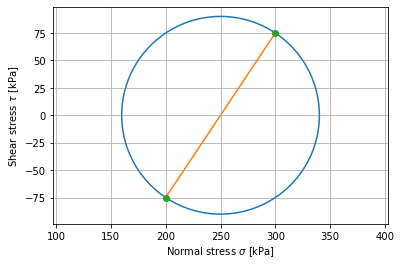

In [32]:
alpha=np.linspace(0, np.pi, 180)

sigma, tau=Get_stress_at_alpha(S, alpha)

plt.plot(sigma, tau)
plt.xlabel(r'Normal stress $\sigma$ [kPa]')
plt.ylabel(r'Shear stress $\tau$ [kPa]')

plt.plot([S[0][0], S[1][1]],[S[0][1], S[1][0]] )
plt.plot([S[0][0], S[1][1]],[S[0][1], S[1][0]], 'o' )
#plt.plot(sigma_alpha, tau_alpha, 'o')
plt.gca().axis('equal')
plt.gca().grid('True')

# Example 6.3

For the same figure in Example 6.2 find: a) the mean and deviator stresses, and b) check the answers of problem 6.2 and 6.3 graphically.

In [33]:
sm= 0.5*(s1+s2)

print(r'sm= %1.2f kPa' % sm)

sd=s1-s2

print(r'sd= %1.2f kPa' % sd)

sm= 250.00 kPa
sd= 180.28 kPa
